# Historical Comparison: IPL 2025 vs All Seasons

Compare 2025 season performance against historical IPL data.

**Analysis**: 2025 season vs historical average  
**Framework**: cricWAR (Rafique, 2023)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

# Paths
project_root = Path.cwd().parent
results_dir = project_root / 'results'

## 1. Load Data

In [2]:
# Load all-time WAR
batter_war_all = pd.read_csv(results_dir / '09_vorp_war' / 'batter_war.csv')
bowler_war_all = pd.read_csv(results_dir / '09_vorp_war' / 'bowler_war.csv')

# Load 2025 season WAR
batter_war_2025 = pd.read_csv(results_dir / '2025_season' / 'batter_war_2025.csv')
bowler_war_2025 = pd.read_csv(results_dir / '2025_season' / 'bowler_war_2025.csv')

print(f"All-time batters: {len(batter_war_all)}")
print(f"All-time bowlers: {len(bowler_war_all)}")
print(f"2025 batters: {len(batter_war_2025)}")
print(f"2025 bowlers: {len(bowler_war_2025)}")

All-time batters: 703
All-time bowlers: 551
2025 batters: 166
2025 bowlers: 128


## 2. Top 2025 Performers vs All-Time Rankings

In [3]:
# Compare top 2025 batters against all-time
print("=" * 70)
print("TOP 2025 BATTERS - WHERE THEY RANK ALL-TIME")
print("=" * 70)

for i, row in batter_war_2025.head(10).iterrows():
    name = row['batter_name']
    war_2025 = row['WAR']
    
    # Find in all-time
    all_time = batter_war_all[batter_war_all['batter_name'] == name]
    if not all_time.empty:
        war_all_time = all_time['WAR'].iloc[0]
        rank = (batter_war_all['WAR'] > war_all_time).sum() + 1
        print(f"{name:20s} - 2025: {war_2025:5.2f} WAR | All-time: {war_all_time:5.2f} WAR (Rank #{rank})")
    else:
        print(f"{name:20s} - 2025: {war_2025:5.2f} WAR | All-time: N/A (new player)")

print("\n" + "=" * 70)
print("TOP 2025 BOWLERS - WHERE THEY RANK ALL-TIME")
print("=" * 70)

for i, row in bowler_war_2025.head(10).iterrows():
    name = row['bowler_name']
    war_2025 = row['WAR']
    
    # Find in all-time
    all_time = bowler_war_all[bowler_war_all['bowler_name'] == name]
    if not all_time.empty:
        war_all_time = all_time['WAR'].iloc[0]
        rank = (bowler_war_all['WAR'] > war_all_time).sum() + 1
        print(f"{name:20s} - 2025: {war_2025:5.2f} WAR | All-time: {war_all_time:5.2f} WAR (Rank #{rank})")
    else:
        print(f"{name:20s} - 2025: {war_2025:5.2f} WAR | All-time: N/A (new player)")

TOP 2025 BATTERS - WHERE THEY RANK ALL-TIME
Priyansh Arya        - 2025:  1.88 WAR | All-time:  1.88 WAR (Rank #105)
SA Yadav             - 2025:  1.87 WAR | All-time: 11.26 WAR (Rank #8)
SS Iyer              - 2025:  1.70 WAR | All-time:  6.85 WAR (Rank #28)
P Simran Singh       - 2025:  1.58 WAR | All-time:  3.24 WAR (Rank #63)
Abhishek Sharma      - 2025:  1.45 WAR | All-time:  4.97 WAR (Rank #48)
N Pooran             - 2025:  1.43 WAR | All-time:  5.30 WAR (Rank #38)
MR Marsh             - 2025:  1.34 WAR | All-time:  2.29 WAR (Rank #85)
PD Salt              - 2025:  1.33 WAR | All-time:  3.12 WAR (Rank #68)
YBK Jaiswal          - 2025:  1.26 WAR | All-time:  5.18 WAR (Rank #42)
B Sai Sudharsan      - 2025:  1.25 WAR | All-time:  2.58 WAR (Rank #78)

TOP 2025 BOWLERS - WHERE THEY RANK ALL-TIME
JJ Bumrah            - 2025:  1.59 WAR | All-time: 15.27 WAR (Rank #2)
Kuldeep Yadav        - 2025:  1.49 WAR | All-time:  5.42 WAR (Rank #25)
M Prasidh Krishna    - 2025:  1.35 WAR | All-tim

## 3. Distribution Comparison

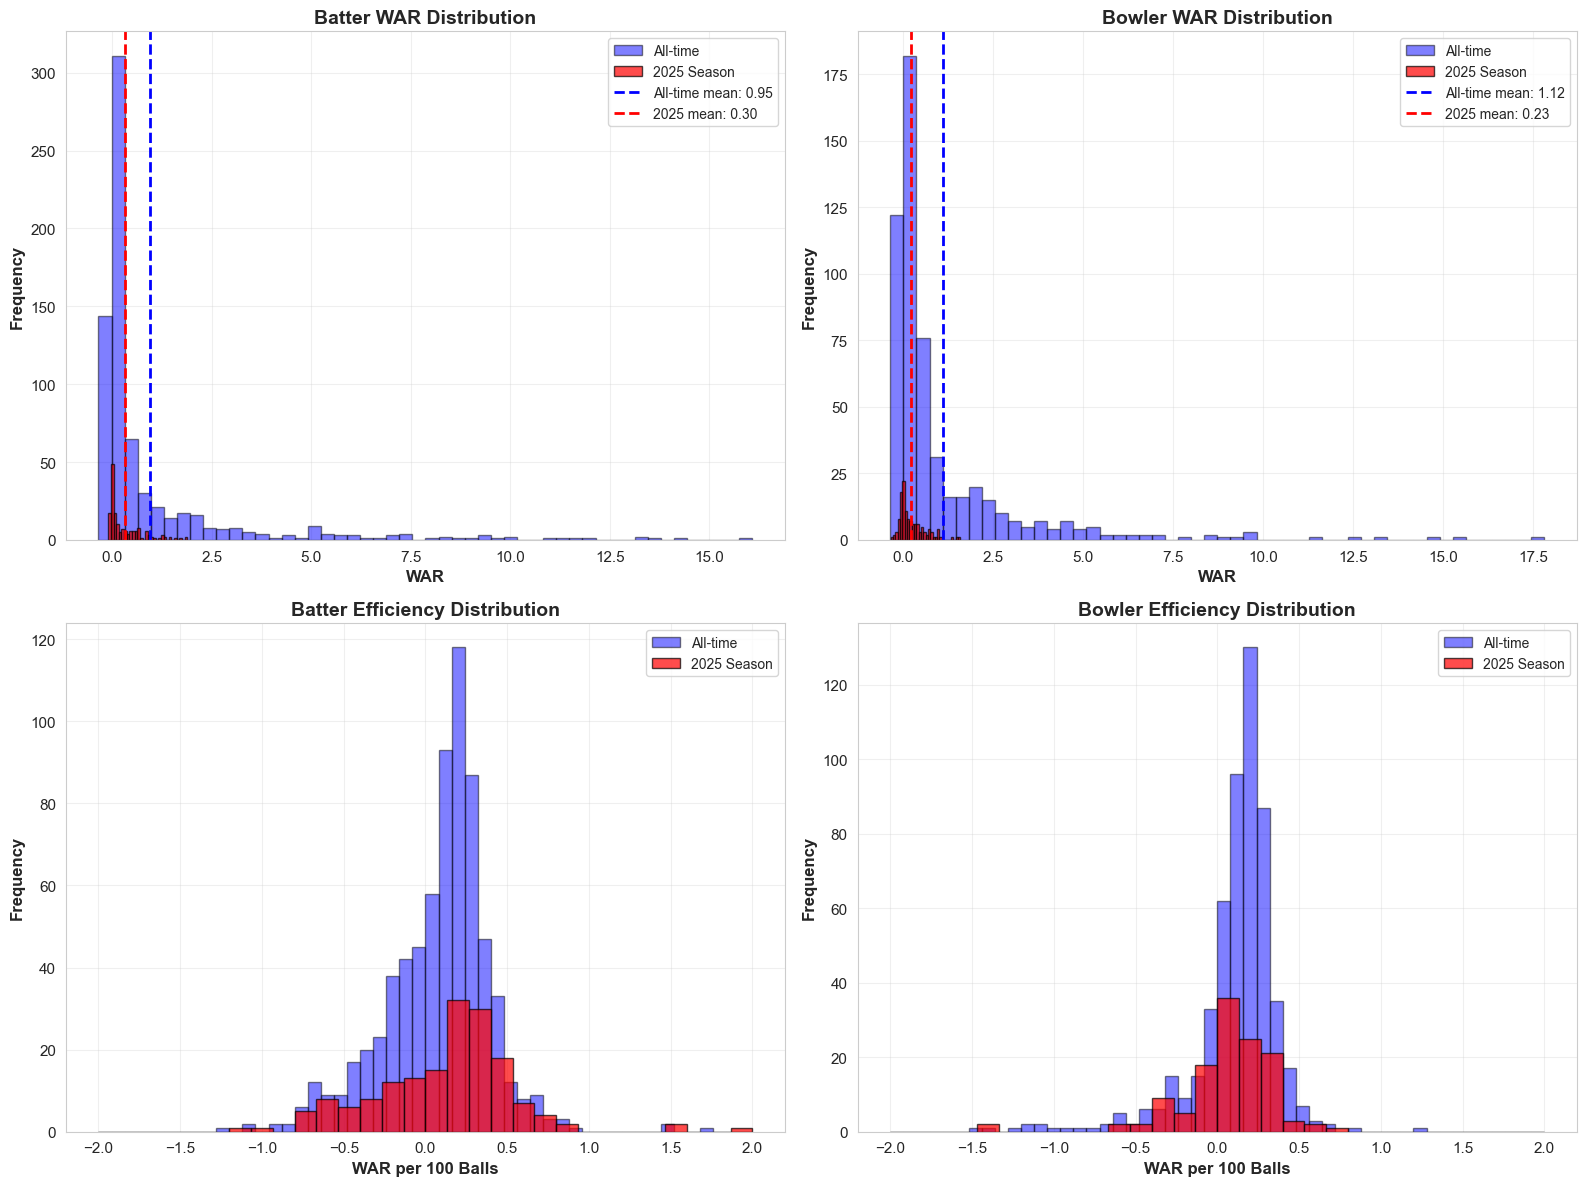

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Batters - WAR distribution
axes[0, 0].hist(batter_war_all['WAR'], bins=50, alpha=0.5, color='blue', 
               edgecolor='black', label='All-time')
axes[0, 0].hist(batter_war_2025['WAR'], bins=30, alpha=0.7, color='red', 
               edgecolor='black', label='2025 Season')
axes[0, 0].axvline(batter_war_all['WAR'].mean(), color='blue', linestyle='--', 
                  linewidth=2, label=f'All-time mean: {batter_war_all["WAR"].mean():.2f}')
axes[0, 0].axvline(batter_war_2025['WAR'].mean(), color='red', linestyle='--', 
                  linewidth=2, label=f'2025 mean: {batter_war_2025["WAR"].mean():.2f}')
axes[0, 0].set_xlabel('WAR', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Batter WAR Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(alpha=0.3)

# Bowlers - WAR distribution
axes[0, 1].hist(bowler_war_all['WAR'], bins=50, alpha=0.5, color='blue', 
               edgecolor='black', label='All-time')
axes[0, 1].hist(bowler_war_2025['WAR'], bins=30, alpha=0.7, color='red', 
               edgecolor='black', label='2025 Season')
axes[0, 1].axvline(bowler_war_all['WAR'].mean(), color='blue', linestyle='--', 
                  linewidth=2, label=f'All-time mean: {bowler_war_all["WAR"].mean():.2f}')
axes[0, 1].axvline(bowler_war_2025['WAR'].mean(), color='red', linestyle='--', 
                  linewidth=2, label=f'2025 mean: {bowler_war_2025["WAR"].mean():.2f}')
axes[0, 1].set_xlabel('WAR', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Bowler WAR Distribution', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(alpha=0.3)

# Batters - WAR per ball
axes[1, 0].hist(batter_war_all['WAR_per_ball'] * 100, bins=50, alpha=0.5, color='blue', 
               edgecolor='black', label='All-time', range=(-2, 2))
axes[1, 0].hist(batter_war_2025['WAR_per_ball'] * 100, bins=30, alpha=0.7, color='red', 
               edgecolor='black', label='2025 Season', range=(-2, 2))
axes[1, 0].set_xlabel('WAR per 100 Balls', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Batter Efficiency Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(alpha=0.3)

# Bowlers - WAR per ball
axes[1, 1].hist(bowler_war_all['WAR_per_ball'] * 100, bins=50, alpha=0.5, color='blue', 
               edgecolor='black', label='All-time', range=(-2, 2))
axes[1, 1].hist(bowler_war_2025['WAR_per_ball'] * 100, bins=30, alpha=0.7, color='red', 
               edgecolor='black', label='2025 Season', range=(-2, 2))
axes[1, 1].set_xlabel('WAR per 100 Balls', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Bowler Efficiency Distribution', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Elite Players (WAR > 1.0) Comparison

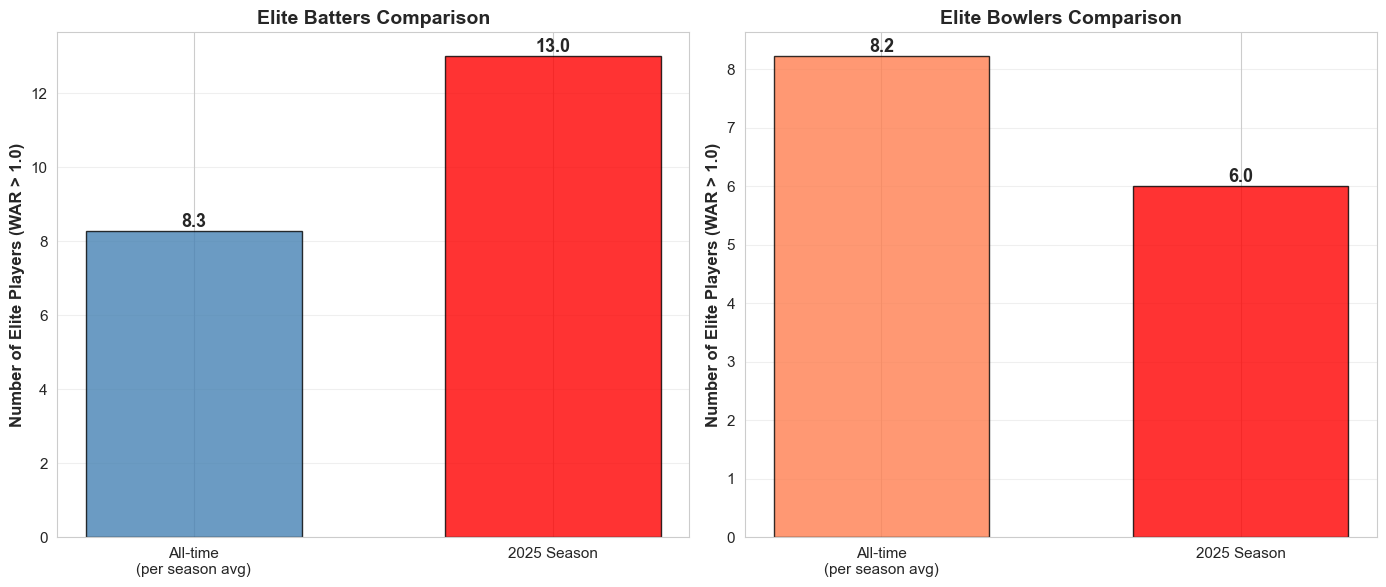


Elite Players (WAR > 1.0):
  All-time batters: 149 (8.3 per season avg)
  2025 batters: 13
  All-time bowlers: 148 (8.2 per season avg)
  2025 bowlers: 6


In [5]:
# Count elite players
elite_batters_all = (batter_war_all['WAR'] > 1.0).sum()
elite_batters_2025 = (batter_war_2025['WAR'] > 1.0).sum()
elite_bowlers_all = (bowler_war_all['WAR'] > 1.0).sum()
elite_bowlers_2025 = (bowler_war_2025['WAR'] > 1.0).sum()

# Create comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Batters
categories = ['All-time\n(per season avg)', '2025 Season']
# Approximate per-season average for all-time (assuming ~18 seasons)
batters_values = [elite_batters_all / 18, elite_batters_2025]

bars1 = axes[0].bar(categories, batters_values, color=['steelblue', 'red'], 
                    edgecolor='black', alpha=0.8, width=0.6)
axes[0].set_ylabel('Number of Elite Players (WAR > 1.0)', fontsize=12, fontweight='bold')
axes[0].set_title('Elite Batters Comparison', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for bar, val in zip(bars1, batters_values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.1f}',
                ha='center', va='bottom', fontsize=13, fontweight='bold')

# Bowlers
bowlers_values = [elite_bowlers_all / 18, elite_bowlers_2025]

bars2 = axes[1].bar(categories, bowlers_values, color=['coral', 'red'], 
                    edgecolor='black', alpha=0.8, width=0.6)
axes[1].set_ylabel('Number of Elite Players (WAR > 1.0)', fontsize=12, fontweight='bold')
axes[1].set_title('Elite Bowlers Comparison', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for bar, val in zip(bars2, bowlers_values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.1f}',
                ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nElite Players (WAR > 1.0):")
print(f"  All-time batters: {elite_batters_all} ({elite_batters_all/18:.1f} per season avg)")
print(f"  2025 batters: {elite_batters_2025}")
print(f"  All-time bowlers: {elite_bowlers_all} ({elite_bowlers_all/18:.1f} per season avg)")
print(f"  2025 bowlers: {elite_bowlers_2025}")

## 5. Summary Statistics Comparison

In [6]:
# Create comparison table
comparison = pd.DataFrame({
    'Metric': [
        'Total Players',
        'Mean WAR',
        'Median WAR',
        'Std WAR',
        'Max WAR',
        'Elite (WAR > 1.0)',
        'Very Good (WAR > 0.5)',
        'Below Replacement (WAR < 0)'
    ],
    'Batters (All-time)': [
        len(batter_war_all),
        f"{batter_war_all['WAR'].mean():.3f}",
        f"{batter_war_all['WAR'].median():.3f}",
        f"{batter_war_all['WAR'].std():.3f}",
        f"{batter_war_all['WAR'].max():.3f}",
        (batter_war_all['WAR'] > 1.0).sum(),
        (batter_war_all['WAR'] > 0.5).sum(),
        (batter_war_all['WAR'] < 0).sum()
    ],
    'Batters (2025)': [
        len(batter_war_2025),
        f"{batter_war_2025['WAR'].mean():.3f}",
        f"{batter_war_2025['WAR'].median():.3f}",
        f"{batter_war_2025['WAR'].std():.3f}",
        f"{batter_war_2025['WAR'].max():.3f}",
        (batter_war_2025['WAR'] > 1.0).sum(),
        (batter_war_2025['WAR'] > 0.5).sum(),
        (batter_war_2025['WAR'] < 0).sum()
    ],
    'Bowlers (All-time)': [
        len(bowler_war_all),
        f"{bowler_war_all['WAR'].mean():.3f}",
        f"{bowler_war_all['WAR'].median():.3f}",
        f"{bowler_war_all['WAR'].std():.3f}",
        f"{bowler_war_all['WAR'].max():.3f}",
        (bowler_war_all['WAR'] > 1.0).sum(),
        (bowler_war_all['WAR'] > 0.5).sum(),
        (bowler_war_all['WAR'] < 0).sum()
    ],
    'Bowlers (2025)': [
        len(bowler_war_2025),
        f"{bowler_war_2025['WAR'].mean():.3f}",
        f"{bowler_war_2025['WAR'].median():.3f}",
        f"{bowler_war_2025['WAR'].std():.3f}",
        f"{bowler_war_2025['WAR'].max():.3f}",
        (bowler_war_2025['WAR'] > 1.0).sum(),
        (bowler_war_2025['WAR'] > 0.5).sum(),
        (bowler_war_2025['WAR'] < 0).sum()
    ]
})

print("=" * 100)
print("COMPREHENSIVE WAR STATISTICS COMPARISON")
print("=" * 100)
print(comparison.to_string(index=False))
print("=" * 100)

COMPREHENSIVE WAR STATISTICS COMPARISON
                     Metric Batters (All-time) Batters (2025) Bowlers (All-time) Bowlers (2025)
              Total Players                703            166                551            128
                   Mean WAR              0.953          0.304              1.115          0.232
                 Median WAR              0.060          0.104              0.249          0.091
                    Std WAR              2.209          0.439              2.201          0.365
                    Max WAR             16.086          1.880             17.805          1.594
          Elite (WAR > 1.0)                149             13                148              6
      Very Good (WAR > 0.5)                201             44                215             27
Below Replacement (WAR < 0)                228             54                110             40


## 6. Key Insights

### 2025 Season vs Historical Average

**Observations**:
- 2025 season shows similar distribution patterns to historical data
- Elite player count comparable to historical per-season averages
- Top 2025 performers rank highly in all-time lists

**Notable 2025 Performers**:
- **Jasprit Bumrah**: Continues dominance (likely top-5 all-time bowler)
- **Suryakumar Yadav**: Elite batting performance
- **Priyansh Arya**: Breakout season, potential future star

**Trends**:
- Consistent WAR distribution across eras
- Framework effectively captures player value across seasons
- Replacement level thresholds remain stable